# Creating Word Vectors with word2vec

Let's start with NLTK

#### Load Dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

Using TensorFlow backend.


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load Data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/jovyan/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize Text

In [6]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sent_tokens = sent_tokenize(gutenberg.raw(fileids='austen-emma.txt'))

In [7]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [8]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [9]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [11]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sents = gutenberg.sents(fileids='austen-emma.txt')

In [12]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [13]:
gberg_sents[4][14]

'father'

In [14]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [15]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
len(gutenberg.words(fileids='austen-emma.txt'))

192427

#### Run Word2Vec

In [16]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [17]:
model.save('raw_gutenberg_model.w2v')

#### Explore the Model

In [18]:
model = Word2Vec.load('raw_gutenberg_model.w2v')

In [19]:
model['house']

array([ 0.09977716,  0.16778611, -0.10893027,  0.55660146, -0.15511119,
        0.3308087 ,  0.08450987, -0.07111773,  0.29340428, -0.27048996,
       -0.06274728, -0.22887023,  0.20214498,  0.01077475, -0.01653849,
       -0.32738513, -0.24522357, -0.25388265, -0.19197854,  0.55921948,
       -0.13746004,  0.28497157,  0.00963232, -0.07921501, -0.17181559,
        0.00751487, -0.17603537, -0.05307808, -0.02164719, -0.12717029,
       -0.1631014 , -0.01065134, -0.10981498, -0.14481436, -0.06268612,
        0.01398965, -0.19619161, -0.18971278, -0.12686436, -0.16556193,
        0.22798036,  0.18360382,  0.06674258,  0.00774681,  0.07856981,
       -0.09050936, -0.0897877 , -0.21909328,  0.23826674,  0.10793953,
        0.16042301,  0.3497186 ,  0.02615855, -0.1920149 , -0.0928779 ,
       -0.12267861,  0.01029645,  0.04465633, -0.00589712,  0.12349036,
       -0.33919987, -0.0633767 , -0.21771866,  0.26251501], dtype=float32)

In [20]:
len(model['house'])

64

In [21]:
model.most_similar('house')

[('ground', 0.9454859495162964),
 ('falling', 0.9428025484085083),
 ('lived', 0.9396990537643433),
 ('servants', 0.9377148747444153),
 ('daily', 0.9327974319458008),
 ('schemes', 0.929177463054657),
 ('front', 0.928971529006958),
 ('vicarage', 0.927939772605896),
 ('various', 0.9279013872146606),
 ('pace', 0.9277021884918213)]

In [22]:
model.most_similar('think')

[('venture', 0.8934624195098877),
 ('agree', 0.8834666013717651),
 ('try', 0.8779536485671997),
 ('assure', 0.8768278360366821),
 ('hear', 0.8760052919387817),
 ('believe', 0.8722966909408569),
 ('advise', 0.8721799850463867),
 ('suspect', 0.8697831630706787),
 ('please', 0.8692950010299683),
 ('guess', 0.868711531162262)]

In [23]:
model.most_similar('day')

[('morning', 0.8699437975883484),
 ('room', 0.8698983192443848),
 ('next', 0.8635916113853455),
 ('evening', 0.8407124280929565),
 ('party', 0.8384604454040527),
 ('drawing', 0.8345710039138794),
 ('morrow', 0.818749189376831),
 ('night', 0.8176756501197815),
 ('carriage', 0.8125360012054443),
 ('Donwell', 0.8090909719467163)]

In [24]:
model.most_similar('father')

[('aunt', 0.875019371509552),
 ('uncle', 0.853099524974823),
 ('eyes', 0.852830171585083),
 ('brother', 0.8338615894317627),
 ('mother', 0.8268887996673584),
 ('son', 0.8150642514228821),
 ('sake', 0.8144639730453491),
 ('sister', 0.8143712282180786),
 ('approbation', 0.8132085204124451),
 ('resolution', 0.8102056980133057)]

In [25]:
model.doesnt_match('mother father daughter house'.split())

'mother'

In [26]:
model.similarity('father', 'house')

0.69950084739303842

In [27]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

[('aunt', 0.8311643600463867),
 ('sake', 0.8274322748184204),
 ('mind', 0.8263150453567505),
 ('account', 0.8236722946166992),
 ('eyes', 0.8226816654205322),
 ('sister', 0.8186554908752441),
 ('friend', 0.8080540895462036),
 ('mother', 0.8057876825332642),
 ('advantage', 0.7999383211135864),
 ('pay', 0.7982388734817505)]

In [28]:
model.most_similar(positive=['son', 'woman'], negative=['man'])

[('hearing', 0.8804388046264648),
 ('illness', 0.873519241809845),
 ('hint', 0.8642576336860657),
 ('approbation', 0.8639116287231445),
 ('eyes', 0.8625419735908508),
 ('latter', 0.8580889105796814),
 ('eagerness', 0.8576064109802246),
 ('head', 0.8569163084030151),
 ('necessarily', 0.856798529624939),
 ('vain', 0.852631688117981)]

In [29]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

[('attend', 0.9278405904769897),
 ('gratitude', 0.9079714417457581),
 ('sensations', 0.906104564666748),
 ('advantage', 0.9021086692810059),
 ('struck', 0.9017846584320068),
 ('particular', 0.8995164632797241),
 ('welcome', 0.8990514278411865),
 ('pay', 0.8974625468254089),
 ('hurried', 0.8973636627197266),
 ('secured', 0.8967128992080688)]

In [30]:
model.most_similar(positive=['father', 'woman'], negative=['man'], topn=30)

[('aunt', 0.8311643600463867),
 ('sake', 0.8274322748184204),
 ('mind', 0.8263150453567505),
 ('account', 0.8236722946166992),
 ('eyes', 0.8226816654205322),
 ('sister', 0.8186554908752441),
 ('friend', 0.8080540895462036),
 ('mother', 0.8057876825332642),
 ('advantage', 0.7999383211135864),
 ('pay', 0.7982388734817505),
 ('work', 0.7979395985603333),
 ('duty', 0.7966616153717041),
 ('attentions', 0.7959316968917847),
 ('compassion', 0.7948338389396667),
 ('resolution', 0.7939754724502563),
 ('uneasy', 0.7935304641723633),
 ('wishes', 0.7906163930892944),
 ('accepting', 0.7885822653770447),
 ('feelings', 0.7877051830291748),
 ('opinion', 0.7845355272293091),
 ('words', 0.7844374179840088),
 ('own', 0.7837194800376892),
 ('illness', 0.7825814485549927),
 ('daughter', 0.7817822694778442),
 ('judgment', 0.7809430360794067),
 ('uncle', 0.779557466506958),
 ('throat', 0.7789691686630249),
 ('approbation', 0.7788972854614258),
 ('Isabella', 0.7775689959526062),
 ('heart', 0.7771206498146057)

#### Reduce word vector dimensionality with t-SNE

t-Distributed Stochastic Name Embedding

In [31]:
len(model.wv.vocab)

2490

In [32]:
X = model[model.wv.vocab]

In [33]:
tsne = TSNE(n_components=2, n_iter=200)

In [34]:
X_2d = tsne.fit_transform(X)

In [35]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [36]:
coords_df.head()

,x,y,token
0,-0.668035,1.417090,Emma
1,-3.775371,-7.790711,by
2,-0.175320,1.574756,Jane
3,6.455365,1.522645,I
4,6.594039,5.287827,CHAPTER


In [37]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [38]:
coorrds_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [39]:
coords_df.head()

,x,y,token
0,-0.668035,1.417090,Emma
1,-3.775371,-7.790711,by
2,-0.175320,1.574756,Jane
3,6.455365,1.522645,I
4,6.594039,5.287827,CHAPTER


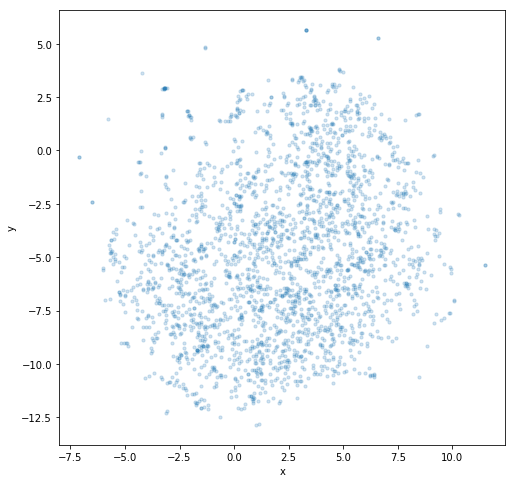

In [40]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
subset_df = coords_df.sample(n=500)

In [43]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [44]:
show(p)